# S.I.R Model - SciPy Implementation

The S.I.R (Susceptible, Infected, Removed) system of ODEs is a simple epidemiological model that can describe the spread of an infectious disease throughout a population. The three possible states can be described as follows:
1. Susceptible - members of the population that are not infected, but not immune
2. Infected - members of the population that are currently infected
3. Removed - members of the population that have survived and gained immunity to the disease

The state vector is thus described by:

$$\vec{u}(t) = \begin{bmatrix}
s(t)
\\i(t)
\\r(t)
\end{bmatrix}$$

and the state derivative is as follows

$$\frac{d\vec{u}(t)}{dt} = 

\begin{bmatrix}
-\beta s(t) i(t)
\\ \beta s(t)i(t) - \kappa i(t)
\\ \kappa i(t)
\end{bmatrix}

=

\begin{bmatrix}
-\beta u_{0} u_{1}
\\ \beta u_{0}u_{1} - \kappa u_{1}
\\ \kappa u_{1}
\end{bmatrix}

$$

where

$\beta$ = infection rate $[days^{-1}]$

$\kappa$ = removal rate $[days^{-1}]$

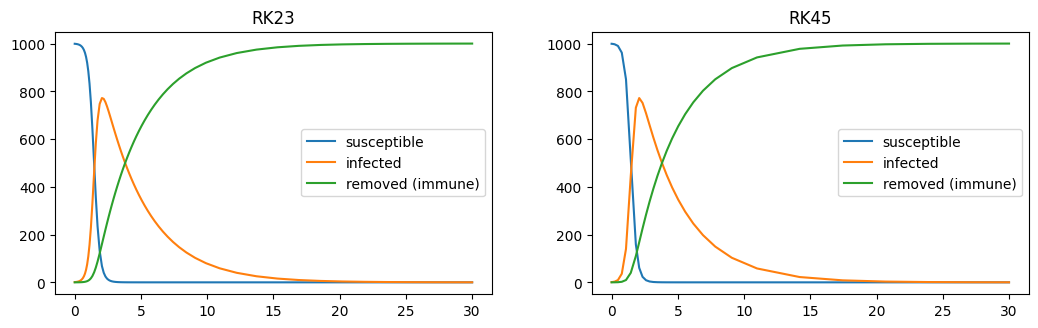

In [1]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
import tqdm as tqdm

# State derivative for SIR
def du(t, u, *args): # SIR state derivative
    # Expects u = [s, i, r] at a given time step
    # Expects args[0] = beta, args[1] = kappa
    du = np.array([
        -args[0]*u[0]*u[1],
        args[0]*u[0]*u[1] - args[1]*u[1],
        args[1]*u[1]
    ])
    return du

t0 = 0 # [days] state time
tf = 30 # [days] end time
s0 = 1000 # number of people
i0 = 1 # number infected
r0 = 0 # number recovered
beta = .005 # infection rate (per day)
kappa = .3 # recovery rate (per day)

# using Scipy to generate state vectors for SIR:
u_RK23 = s.integrate.solve_ivp(du, (t0, tf), [s0, i0, r0], method="RK23", args=(beta, kappa))
u_RK45 = s.integrate.solve_ivp(du, (t0, tf), [s0, i0, r0], method="RK45", args=(beta, kappa))

# Plotting results:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=1.1)
fig.set_figheight(3)
fig.set_figwidth(11)

ax[0].set_title("RK23")
ax[0].plot(u_RK23["t"], u_RK23["y"][0], label="susceptible")
ax[0].plot(u_RK23["t"], u_RK23["y"][1], label="infected")
ax[0].plot(u_RK23["t"], u_RK23["y"][2], label="removed (immune)")
ax[0].legend()

ax[1].set_title("RK45")
ax[1].plot(u_RK45["t"], u_RK45["y"][0], label="susceptible")
ax[1].plot(u_RK45["t"], u_RK45["y"][1], label="infected")
ax[1].plot(u_RK45["t"], u_RK45["y"][2], label="removed (immune)")
ax[1].legend()

plt.show()

